In [30]:
from itertools import product
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

DATA_DIR = Path().cwd() / "images"
DATA_DIR

PosixPath('/home/receptor/pavlo/structure-methods-of-pattern-recognition/Lab4/images')

In [29]:
def compute_gradients(image):
    width, height, _ = image.shape
    
    # Compute the gradient of the image along x and y for each color channel
    dgradient_x = np.zeros_like(image, dtype=np.float64)
    dgradient_y = np.zeros_like(image, dtype=np.float64)
    
    for k in range(3):  # For each color channel
        for i, j in product(range(1, width - 1), range(1, height - 1)):
            dgradient_x[i, j, k] = image[i - 1, j, k] - 2 * image[i, j, k] + image[i + 1, j, k]
            dgradient_y[i, j, k] = image[i, j - 1, k] - 2 * image[i, j, k] + image[i, j + 1, k]
        
    return dgradient_x, dgradient_y


def poisson_solver(gradient_x, gradient_y, border_image, tolerance=1e-5, max_iterations=1000, task: int = 1):
    # Get the shape of the gradient
    width, height, _ = gradient_x.shape
    
    F = gradient_x + gradient_y

    # Initialize the restored image with the border image
    restored_image = np.copy(border_image)

    # Iterate over each pixel in the image until convergence or maximum iterations
    for iteration in range(max_iterations):
        error = 0.0
        
        if task == 2:
            for k in range(3):  # For each color channel
                for x, y in product(range(1, width + 1), range(1, height + 1)):
                    # Apply the Gauss-Seidel method
                    tmp = (restored_image[x - 1, y, k] + restored_image[x + 1, y, k] + 
                           restored_image[x, y - 1, k] + restored_image[x, y + 1, k] - F[x-1, y-1, k]) / 4

                    # Compute the absolute difference between the old and new pixel values
                    diff = np.abs(restored_image[x, y, k] - tmp)

                    # Update the error
                    error = max(error, diff)

                    restored_image[x, y, k] = tmp
        elif task == 1:
            for k in range(3):  # For each color channel
                for x, y in product(range(1, width - 1), range(1, height - 1)):
                    # Apply the Gauss-Seidel method
                    tmp = (restored_image[x - 1, y, k] + restored_image[x + 1, y, k] + 
                           restored_image[x, y - 1, k] + restored_image[x, y + 1, k] - F[x, y, k]) / 4

                    # Compute the absolute difference between the old and new pixel values
                    diff = np.abs(restored_image[x, y, k] - tmp)

                    # Update the error
                    error = max(error, diff)

                    restored_image[x, y, k] = tmp
        print(f"{iteration}: err={error}")
        if error < tolerance:
            print(f"it_{iteration}: {error}")
            break
    return restored_image


def restore_image(image, task):
    # Compute the gradients of the image
    dgradient_x, dgradient_y = compute_gradients(image)

    # Create a border image with the marginal values of the image
    border_image = np.zeros_like(image)
    border_image[0, :] = image[0, :]
    border_image[-1, :] = image[-1, :]
    border_image[:, 0] = image[:, 0]
    border_image[:, -1] = image[:, -1]

    # Restore the image from its gradient field using the Poisson solver
    restored_image = poisson_solver(dgradient_x, dgradient_y, border_image, task=task)

    return dgradient_x, dgradient_y, restored_image

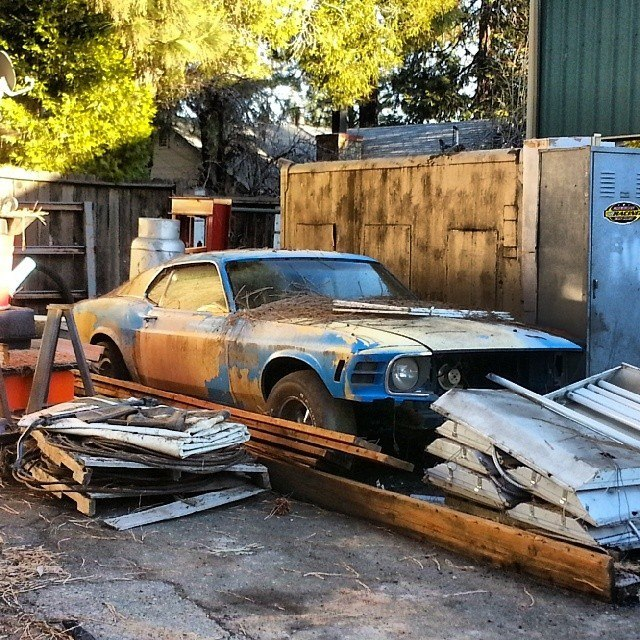

In [25]:
# Load the image
image = Image.open(DATA_DIR / 'car.jpg')
image

In [26]:
image_arr = np.array(image).astype(float)
image_arr.shape

(640, 640, 3)

In [10]:
# Restore the image
gradient_x, gradient_y, restored_image = restore_image(image_arr, 1)

156.31922588955587
74.22331931383627
39.93377001351499
25.720864894440865
19.998198271433722
16.814973078916537
13.774297269523984
11.644345886972673
10.277181588681117
9.044634671302276
7.980553182774386
7.1328580139797
6.458046724589082
5.863069984786861
5.362981251252222
4.976497536975941
4.620590669183073
4.319633819538808
4.088795573299848
3.8808816977115868
3.6880944916578358
3.5188330850732115
3.3563102532021247
3.201039358958127
3.060252496130474
2.9314789457019828
2.808418450659616
2.715039808561812
2.6365008384008775
2.5601270387983988
2.4859944576398476
2.41413965166457
2.344568562234187
2.2772637343382627
2.2121901949705176
2.149300213648104
2.0885371185907786
2.0298383153638895
1.9731376377026777
1.927583580046786
1.884589074402328
1.8426718477325466
1.8018324187822827
1.764406949924421
1.2633391611861668
1.245562515698083
1.2288423604505851
1.2123681554052865
1.196132904407051
1.1801371604606885
1.1643810031516892
1.1488640893913669
1.1335856992080267
1.1185447770940726
1

0.15673200495743345
0.1563343419990133
0.1559380490985518
0.15554312155316552
0.15514955465725677
0.15475734370271255
0.15436648397972874
0.15397697077690964
0.1535887993821632
0.15320196508271522
0.1528164631658342
0.1524322889192149
0.1520494376313195
0.1516679045917897
0.15128768509198665
0.15090877442521844
0.150531167887209
0.15015486077641071
0.14977984839447345
0.14940612604647185
0.1490336890412891
0.14866488440492276
0.14830641319306892
0.14794911232962704
0.14759297804079097
0.14723800654908814
0.14688419407400488
0.14653153683235587
0.14618003103859678
0.14582967290516535
0.1454804586430214
0.14513238446176047
0.14478544657009706
0.1444396411762341
0.14409496448803338
0.143751412713641
0.14340898206140196
0.14306766874045707
0.1427274689610556
0.14238837893452683
0.1420503948741043
0.1417135129946132
0.1413777295132661
0.14104304064957773
0.14070944262567764
0.140376931666907
0.14004550400147764
0.13971515586123928
0.13938588348165126
0.1390576831020951
0.1387305509661303
0.

0.07867050183872948
0.07858813213913152
0.07850587850248303
0.07842374077056036
0.07834171878488405
0.07825981238687518
0.07817802141761376
0.07809634571813717
0.07801478512921278
0.07793333949145165
0.0778520086453085
0.07777079243105334
0.07768969068878562
0.07760870325850533
0.0775278299799993
0.07744707069295487
0.07736642523688886
0.07728589345123282
0.07720547517517673
0.07712517024792476
0.07704497850852476
0.07696489979583987
0.07688493394867635
0.07680508080575521
0.07672534020569799
0.07664571198695569
0.07656624402198986
0.07648696769197727
0.07640780222178023
0.07632874745522145
0.07624980323612363
0.07617096940812473
0.0760922458148201
0.07601363229973401
0.07593512870624863
0.07585673487774613
0.07577845065746658
0.07570027588863582
0.07562221041438022
0.07554425407775511
0.07546781349077492
0.07539194225968515
0.0753161716053512
0.0752405014082882
0.07516493154875548
0.07508946190669974
0.07501409236199663
0.07493882279416653
0.07486365308254506
0.07478858310629732
0.074

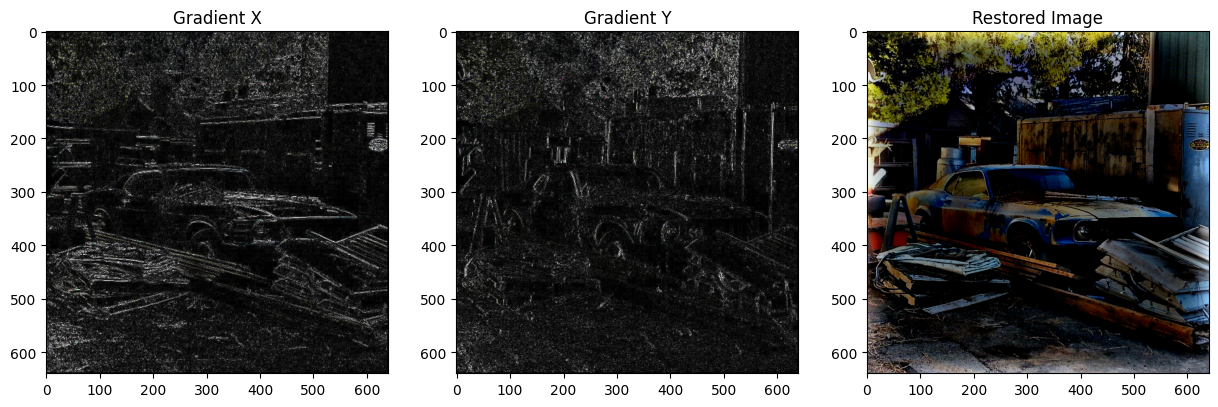

In [19]:
# Display the gradient images and the restored image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.abs(gradient_x).astype(np.uint8))
plt.title('Gradient X')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(gradient_y).astype(np.uint8))
plt.title('Gradient Y')

plt.subplot(1, 3, 3)
plt.imshow(np.clip(restored_image, 0, 255).astype(np.uint8))
plt.title('Restored Image')

plt.show()

In [33]:
def seamless_clone(source, target, offset, task):
    width, height, _ = source.shape
    
    # Compute the gradients of the image
    dgradient_x, dgradient_y = compute_gradients(source)
    
    x_slice = slice(offset[0] - 1, offset[0] + width + 1)
    y_slice = slice(offset[1] - 1, offset[1] + height + 1)
    
    t = target[x_slice, y_slice]
    border_image = np.zeros_like(t)
    border_image[0, :] = t[0, :]
    border_image[-1, :] = t[-1, :]
    border_image[:, 0] = t[:, 0]
    border_image[:, -1] = t[:, -1]
    
    # Restore the image from its gradient field using the Poisson solver
    img = poisson_solver(dgradient_x, dgradient_y, border_image, task=task)
    img = np.clip(img, 0, 255)
    
    target[x_slice, y_slice] = img
    target = target.astype(np.uint8)

    return target

In [32]:
image = Image.open(DATA_DIR / 'car.jpg')
image_arr = np.array(image).astype(float)

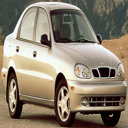

In [9]:
# Load the image
image_lanos = Image.open(DATA_DIR / 'lanos.png').resize((128, 128))
image_lanos

In [10]:
image_lanos = np.array(image_lanos).astype(float)
image_lanos.shape

(128, 128, 4)

In [11]:
image_lanos = image_lanos[:, :, :3]
image_lanos.shape

(128, 128, 3)

In [21]:
offset = (500, 180)  # Adjust the offset as needed

In [34]:
# Perform the seamless cloning
result = seamless_clone(image_lanos, image_arr, offset, 2)

0: err=110.4780070995752
1: err=59.984452376045965
2: err=32.59190076103141
3: err=21.267591942383078
4: err=14.81405120806943
5: err=12.756358173413219
6: err=11.260884066959079
7: err=10.291202417940525
8: err=9.36621113994616
9: err=8.510111685190907
10: err=7.734053720622768
11: err=7.037645887491777
12: err=6.415039787255779
13: err=5.859171996308703
14: err=5.498335667571212
15: err=5.187279337978055
16: err=4.8992140719813335
17: err=4.634220254552986
18: err=4.386454666093982
19: err=4.1619989080867015
20: err=3.9730757870133857
21: err=3.7939276363493093
22: err=3.6244342047111076
23: err=3.4675275364115663
24: err=3.318993313954735
25: err=3.1784565179894457
26: err=3.0455216403660756
27: err=2.919786036566279
28: err=2.8008494377360194
29: err=2.6884300221494755
30: err=2.5837196805268263
31: err=2.4845032610930957
32: err=2.3904538279950316
33: err=2.301261709195984
34: err=2.2214460804224245
35: err=2.1495607938106787
36: err=2.0817803199515765
37: err=2.0169345113729946
3

296: err=0.24140901777445833
297: err=0.24080945151462174
298: err=0.2402107041828998
299: err=0.23961279282390535
300: err=0.2390157340999508
301: err=0.23841954429745726
302: err=0.23782423933288044
303: err=0.23722983475896342
304: err=0.2366363457705063
305: err=0.23604378721049102
306: err=0.23545217357562365
307: err=0.2348615190221892
308: err=0.2342840793350689
309: err=0.23372418322418298
310: err=0.23316499016846137
311: err=0.23260651570083724
312: err=0.2320487750202318
313: err=0.23149178299659923
314: err=0.2309355541764262
315: err=0.2303801027876773
316: err=0.22982544274493932
317: err=0.2292715876544804
318: err=0.22871855081903902
319: err=0.22816634524299673
320: err=0.22761498363681198
321: err=0.22706945685494873
322: err=0.22653606721824815
323: err=0.22600334799588495
324: err=0.2254782518187568
325: err=0.22496351770419665
326: err=0.2244543164481314
327: err=0.22394564229611547
328: err=0.2234375094785861
329: err=0.2229299319406124
330: err=0.2224229233461585

582: err=0.13734573338069822
583: err=0.13712643492463883
584: err=0.13690750491188908
585: err=0.13668894367327766
586: err=0.13647075152688615
587: err=0.13625292877839001
588: err=0.13603547572101604
589: err=0.1358183926358123
590: err=0.13560167979176185
591: err=0.13538533744589643
592: err=0.1351693658433959
593: err=0.1349537652178583
594: err=0.13473853579120032
595: err=0.13452367777406948
596: err=0.13430919136578723
597: err=0.13409507675449106
598: err=0.13388133411731928
599: err=0.1336679636205389
600: err=0.1334549654196735
601: err=0.13324233965946064
602: err=0.1330300864743208
603: err=0.13281820598811578
604: err=0.1326094039503829
605: err=0.13240101013546735
606: err=0.13219297989860834
607: err=0.13198531333034325
608: err=0.1317780105116526
609: err=0.13157107151413783
610: err=0.1313644964001064
611: err=0.13115828522269624
612: err=0.13095243802595036
613: err=0.13074695484495535
614: err=0.13054183570592315
615: err=0.13033708062632243
616: err=0.130132689614

867: err=0.09384415262479706
868: err=0.09374614801237158
869: err=0.0936482803226113
870: err=0.0935505494372535
871: err=0.09345295523726804
872: err=0.09335549760245954
873: err=0.09325817641169465
874: err=0.09316099154276003
875: err=0.09306394287258968
876: err=0.09296703027700914
877: err=0.09287025363101975
878: err=0.09277361280857122
879: err=0.09267710768278903
880: err=0.09258073812574708
881: err=0.09248450400875186
882: err=0.09238840520208669
883: err=0.09229244157523908
884: err=0.09219661299675863
885: err=0.09210091933442754
886: err=0.09200536045506169
887: err=0.09191017625823861
888: err=0.09181624023136692
889: err=0.09172243483681086
890: err=0.09162875993948205
891: err=0.09153521540375209
892: err=0.09144180109308309
893: err=0.09134851687042556
894: err=0.09125536259790579
895: err=0.09116233813705321
896: err=0.09106944334874356
897: err=0.0909766780931136
898: err=0.09088404222964641
899: err=0.0907915356173703
900: err=0.09070055138587918
901: err=0.0906114

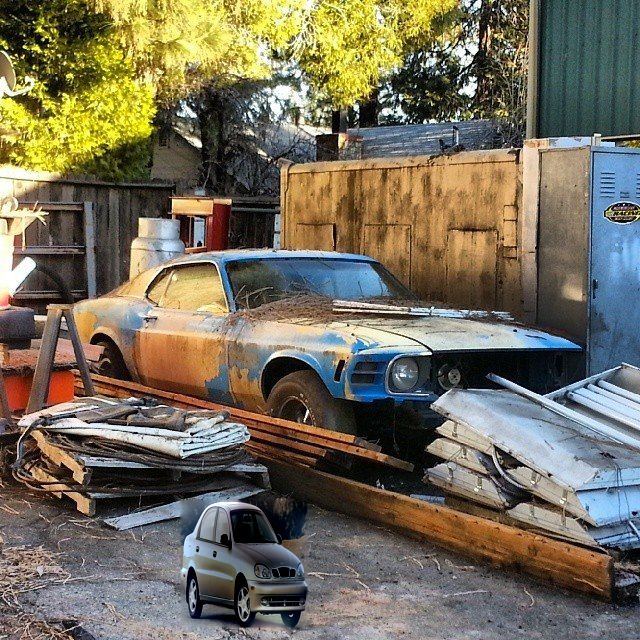

In [35]:
Image.fromarray(result)